In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score,KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


import datetime
import operator
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674


In [4]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7269,7272,7280,7281,7281,7284,7284,7284,7284,7284
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2909,2916,2924,2931,2937,2940,2944,2948,2948,2955
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5913,5918,5920,5924,5927,5931,5936,5939,5941,5945
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1707,1708,1710,1713,1713,1716,1718,1719,1719,1720


In [5]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/29/21', '10/30/21', '10/31/21', '11/1/21', '11/2/21', '11/3/21',
       '11/4/21', '11/5/21', '11/6/21', '11/7/21'],
      dtype='object', length=660)

In [7]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21
0,0,0,0,0,0,0,0,0,0,0,...,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397
1,0,0,0,0,0,0,0,0,0,0,...,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125
2,0,0,0,0,0,0,0,0,0,0,...,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156
3,0,0,0,0,0,0,0,0,0,0,...,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618
4,0,0,0,0,0,0,0,0,0,0,...,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674


In [8]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21
230,0,1,3,3,4,5,7,7,10,13,...,192099,195211,198374,200844,204340,207975,210978,212745,215780,218333


In [9]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21
0,0,0,0,0,0,0,0,0,0,0,...,7269,7272,7280,7281,7281,7284,7284,7284,7284,7284
1,0,0,0,0,0,0,0,0,0,0,...,2909,2916,2924,2931,2937,2940,2944,2948,2948,2955
2,0,0,0,0,0,0,0,0,0,0,...,5913,5918,5920,5924,5927,5931,5936,5939,5941,5945
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1707,1708,1710,1713,1713,1716,1718,1719,1719,1720


In [10]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [12]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(249866895,
 5049007,
 0,
 [557,
  655,
  941,
  1434,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30805,
  34399,
  37130,
  40161,
  42769,
  44811,
  45229,
  60381,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79550,
  80404,
  81381,
  82740,
  84128,
  86022,
  88400,
  90379,
  92980,
  95282,
  98100,
  102016,
  106113,
  110051,
  114230,
  119055,
  126717,
  132519,
  146875,
  157974,
  169251,
  184036,
  200039,
  219595,
  246703,
  277579,
  309721,
  344828,
  387489,
  428574,
  479663,
  542525,
  607435,
  677100,
  734000,
  799279,
  876098,
  959098,
  1042125,
  1126354,
  1185448,
  1256304,
  1330214,
  1399820,
  1483141,
  1570148,
  1655435,
  1729826,
  1849398,
  1920451,
  2004358,
  2082579,
  2178265,
  2266304,
  2343476,
  2420251,
  2495799,
  2571855,
  2653237,
  2737236,
  2821351,
  2903702,
  2975269,
  3045516,
  3121395,
  3198420,
  3281838,
  

In [13]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [14]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1434],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30805],
       [    34399],
       [    37130],
       [    40161],
       [    42769],
       [    44811],
       [    45229],
       [    60381],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79550],
       [    80404],
       [    81381],
       [    82740],
       [    84128],
       [    86022],
       [    88400],
       [    90379],
       [    92980],
       [    95282],
       [    98100],
       [   102016],
       [   106113],
       [   110051],
       [   114230],
       [   119055],
       [   126717],


In [15]:
singapore_cases

array([[     0],
       [     1],
       [     3],
       [     3],
       [     4],
       [     5],
       [     7],
       [     7],
       [    10],
       [    13],
       [    16],
       [    18],
       [    18],
       [    24],
       [    28],
       [    28],
       [    30],
       [    33],
       [    40],
       [    45],
       [    47],
       [    50],
       [    58],
       [    67],
       [    72],
       [    75],
       [    77],
       [    81],
       [    84],
       [    84],
       [    85],
       [    85],
       [    89],
       [    89],
       [    91],
       [    93],
       [    93],
       [    93],
       [   102],
       [   106],
       [   108],
       [   110],
       [   110],
       [   117],
       [   130],
       [   138],
       [   150],
       [   150],
       [   160],
       [   178],
       [   178],
       [   200],
       [   212],
       [   226],
       [   243],
       [   266],
       [   313],
       [   345],
       [   385

In [16]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [17]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [18]:
# visualisation with the latest data

latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      156397
 1      189125
 2      207156
 3       15618
 4       64674
         ...  
 275    968684
 276    455099
 277      9870
 278    209902
 279    133187
 Name: 11/7/21, Length: 280, dtype: int64,
 0       7284
 1       2955
 2       5945
 3        130
 4       1720
        ...  
 275    22531
 276     4705
 277     1909
 278     3664
 279     4685
 Name: 11/7/21, Length: 280, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 260    0
 261    0
 262    0
 263    0
 264    0
 Name: 11/7/21, Length: 265, dtype: int64)

In [19]:
# create a list of unique countries

unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [20]:
# The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [21]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 46487791 cases
India: 34355509 cases
Brazil: 21880439 cases
United Kingdom: 9346961 cases
Russia: 8651561 cases
Turkey: 8233649 cases
France: 7319526 cases
Iran: 5987814 cases
Argentina: 5296781 cases
Spain: 5025639 cases
Colombia: 5015042 cases
Italy: 4808047 cases
Germany: 4792463 cases
Indonesia: 4248165 cases
Mexico: 3826786 cases
Ukraine: 3218967 cases
Poland: 3104220 cases
South Africa: 2923956 cases
Philippines: 2803213 cases
Malaysia: 2506309 cases
Netherlands: 2241183 cases
Peru: 2207510 cases
Iraq: 2062863 cases
Thailand: 1967999 cases
Czechia: 1816161 cases
Canada: 1738543 cases
Japan: 1723682 cases
Chile: 1709189 cases
Romania: 1706882 cases
Bangladesh: 1571013 cases
Belgium: 1414463 cases
Israel: 1333989 cases
Pakistan: 1277160 cases
Serbia: 1183025 cases
Sweden: 1177094 cases
Portugal: 1097557 cases
Kazakhstan: 1029986 cases
Vietnam: 968684 cases
Cuba: 955981 cases
Morocco: 947396 cases
Hungary: 892164 cases
Switzerland: 887446 ca

In [22]:
# Find the list of unique provinces

# remove NaN
# unique_provinces =  list(confirmed_cases['Province/State'].unique())[1:]
unique_provinces =  list(confirmed_cases['Province/State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Unknown',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reu

In [23]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for case in no_cases:
    unique_provinces.remove(case)

In [24]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 1866 cases
New South Wales: 76988 cases
Northern Territory: 229 cases
Queensland: 2098 cases
South Australia: 918 cases
Tasmania: 237 cases
Victoria: 98130 cases
Western Australia: 1112 cases
Alberta: 325983 cases
British Columbia: 208265 cases
Grand Princess: 13 cases
Manitoba: 64209 cases
New Brunswick: 6769 cases
Newfoundland and Labrador: 2003 cases
Northwest Territories: 1886 cases
Nova Scotia: 7550 cases
Nunavut: 674 cases
Ontario: 611255 cases
Prince Edward Island: 319 cases
Quebec: 429863 cases
Repatriated Travellers: 13 cases
Saskatchewan: 78724 cases
Yukon: 1017 cases
Anhui: 1008 cases
Beijing: 1175 cases
Chongqing: 610 cases
Fujian: 1313 cases
Gansu: 340 cases
Guangdong: 3243 cases
Guangxi: 351 cases
Guizhou: 159 cases
Hainan: 190 cases
Hebei: 1423 cases
Heilongjiang: 1958 cases
Henan: 1592 cases
Hong Kong: 12368 cases
Hubei: 68309 cases
Hunan: 1197 cases
Inner Mongolia: 613 cases
Jiangsu: 1603 cases
Jiangxi: 948 cases
Jilin: 579 cases
Liaoning:

In [25]:
# handling nan values if there is any

nan_indices = [] 

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

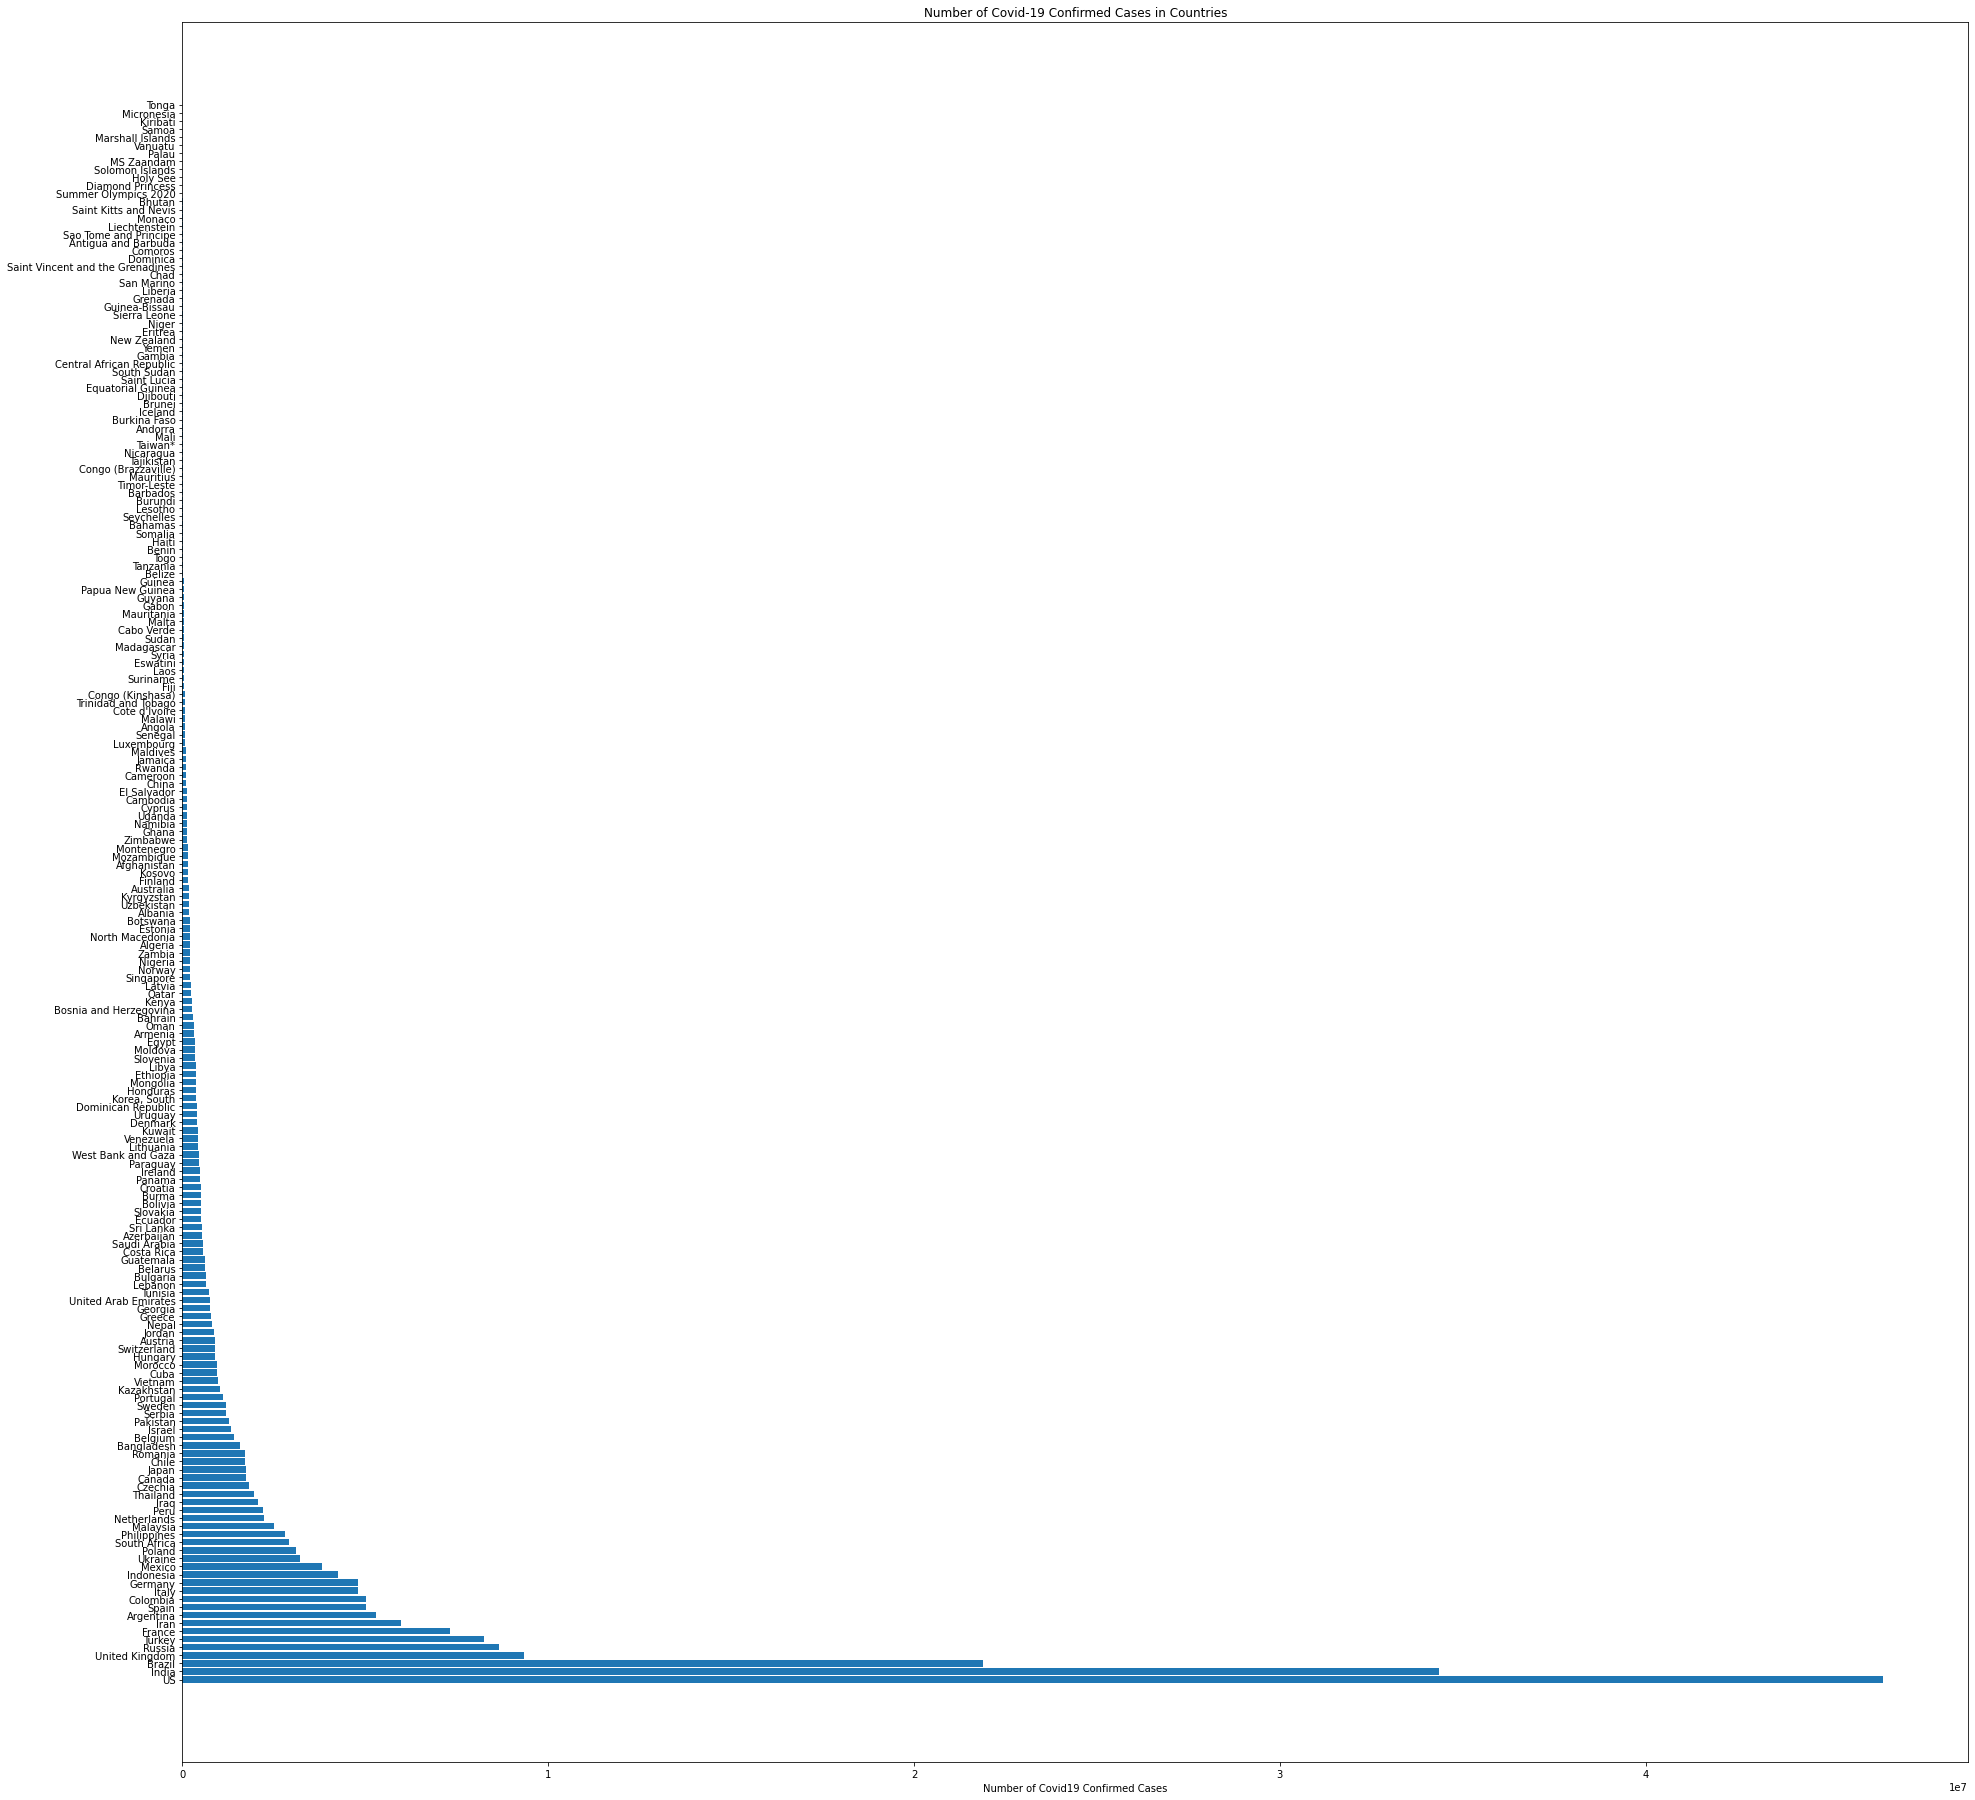

In [26]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [27]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

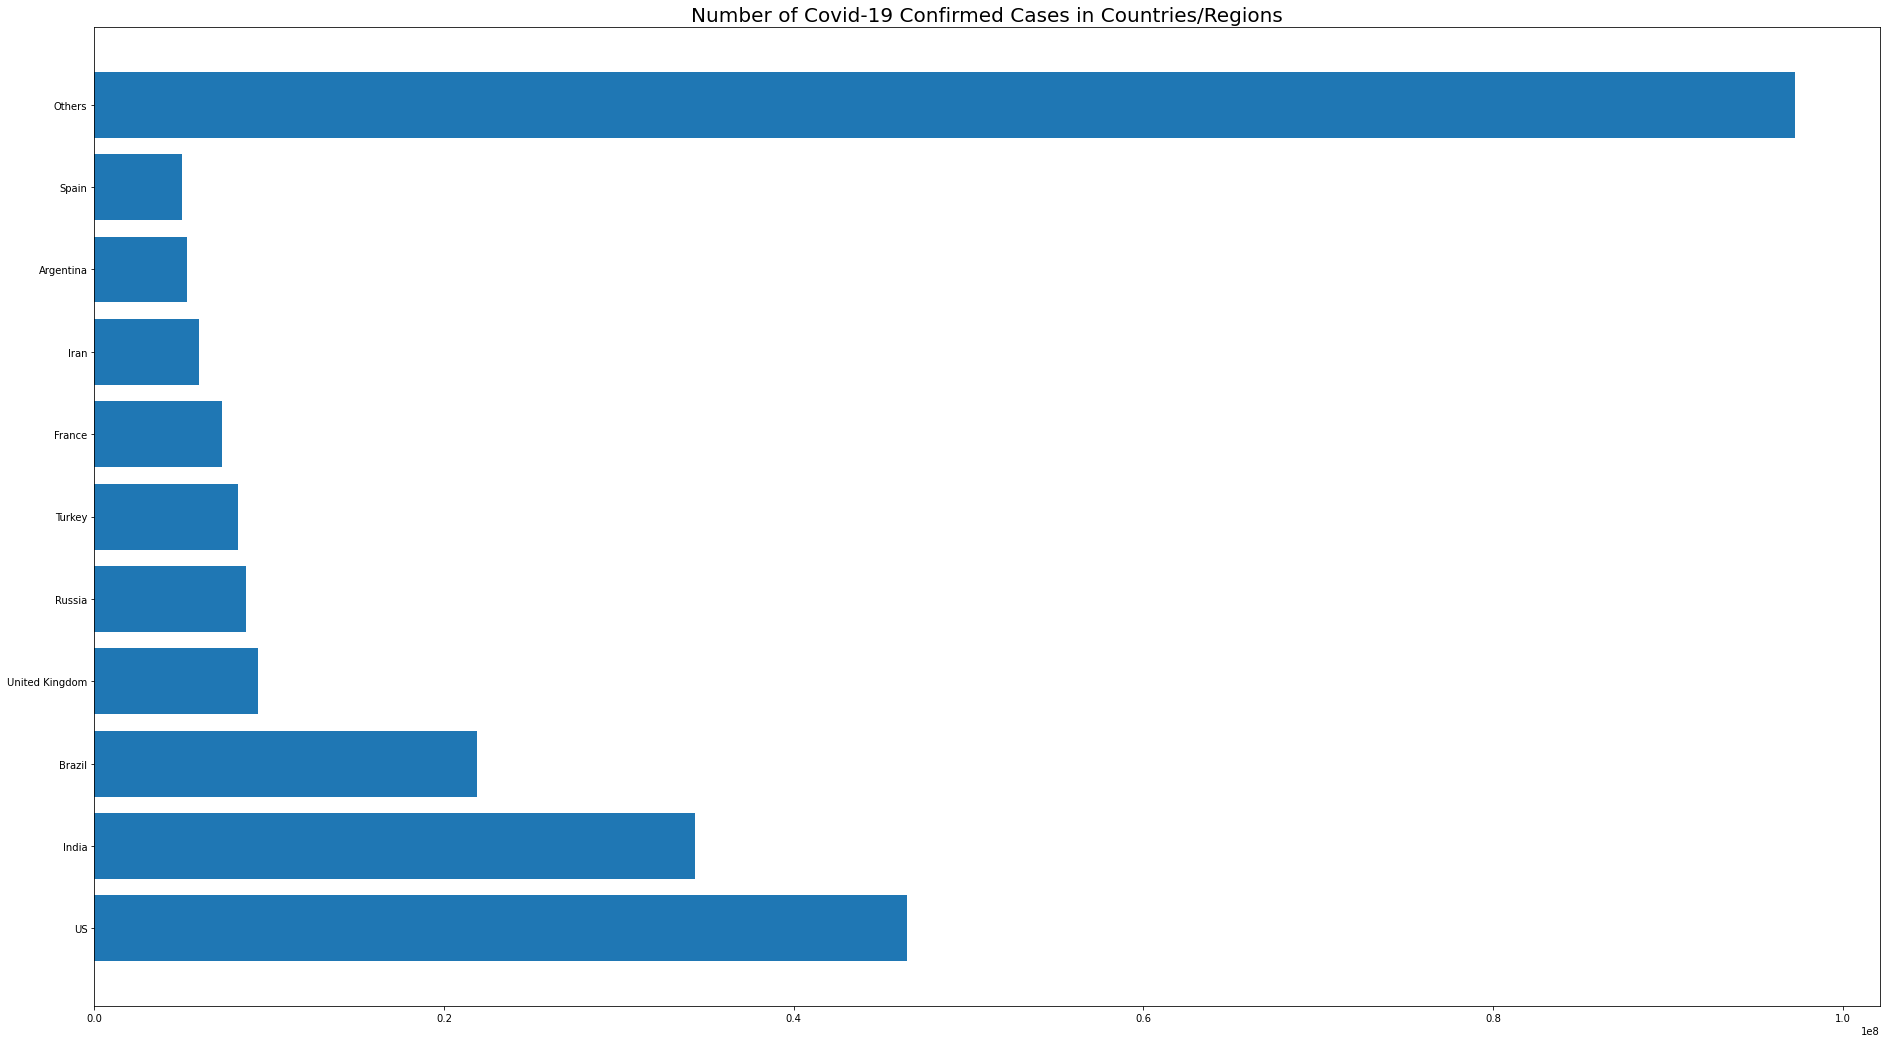

In [28]:
# Visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

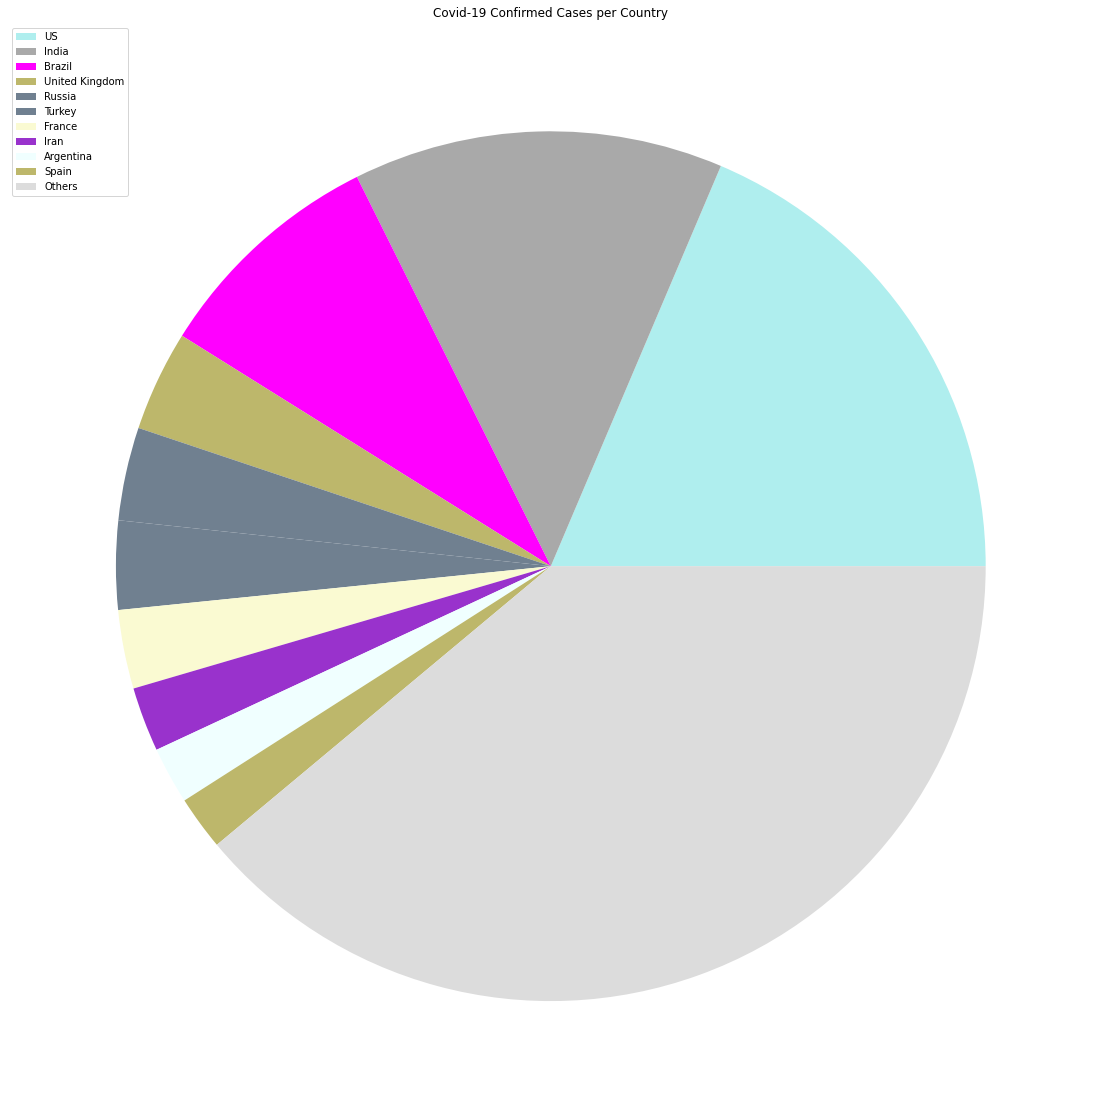

In [29]:
# Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

# Global Predictions

# SVR

In [30]:
# split data into train/test for global

start = datetime.date(2021, 1, 1)
today = datetime.date.today()
diff = today - start
days_to_skip = future_forecast[-1][0] - (100 or diff.days)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.20, random_state=42)

In [31]:
svm = SVR()
svm.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_pred = svm.predict(future_forecast)

MAE: 79336658.47561768
MSE: 8119519752247740.0
RMSE: 90108377.81387334
R-squared score for train: -0.02363318710528972
Adjusted R-squared score for train: -0.02519837546477799
R-squared score for test: -0.008263595516856403
Adjusted R-squared score for test: -0.009805282971775187
Cross Validation Score: -655.1691


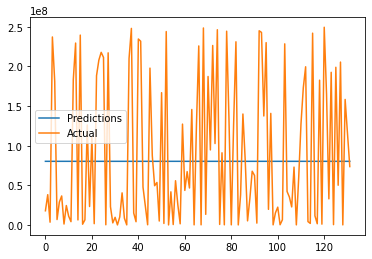

In [32]:
svm_test_pred = svm.predict(X_test_confirmed)
plt.plot(svm_test_pred, label="Predictions")
plt.plot(y_test_confirmed, label="Actual")
plt.legend(loc="best")
train_adjusted_r2 = 1 - (1-svm.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-svm.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
print('MAE:', mean_absolute_error(y_test_confirmed, svm_test_pred))
print('MSE:', mean_squared_error(y_test_confirmed, svm_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_confirmed, svm_test_pred)))
print('R-squared score for train:', svm.score(X_train_confirmed, y_train_confirmed))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', svm.score(X_test_confirmed, y_test_confirmed))
print('Adjusted R-squared score for test:', test_adjusted_r2)
print('Cross Validation Score:', round(np.mean(cross_val_score(svm, days_since_1_22, world_cases.ravel(), cv=5)), 4))

In [33]:
svm_confirmed = SVR(kernel='poly', gamma=0.01, epsilon=1, C=0.01)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_pred = svm_confirmed.predict(future_forecast)

MAE: 17929453.56449669
MSE: 558478649218918.06
RMSE: 23632152.86889703
R-squared score for train: 0.929521154493795
Adjusted R-squared score for train: 0.9294133886749782
R-squared score for test: 0.930649384684977
Adjusted R-squared score for test: 0.9305433439887767
Cross Validation Score: -48.8525


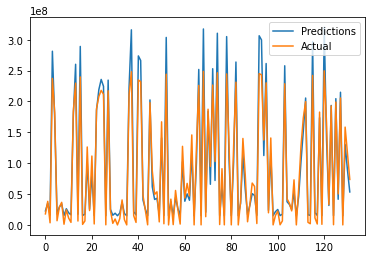

In [34]:
# check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred, label="Predictions")
plt.plot(y_test_confirmed, label="Actual")
plt.legend(loc="best")
# train_adjusted_r2 = 1 - (1-svm_confirmed.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
# test_adjusted_r2 = 1 - (1-svm_confirmed.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
train_adjusted_r2 = 1 - (1-svm_confirmed.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-svm_confirmed.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
print('MAE:', mean_absolute_error(y_test_confirmed, svm_test_pred))
print('MSE:', mean_squared_error(y_test_confirmed, svm_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_confirmed, svm_test_pred)))
print('R-squared score for train:', svm_confirmed.score(X_train_confirmed, y_train_confirmed))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', svm_confirmed.score(X_test_confirmed, y_test_confirmed))
print('Adjusted R-squared score for test:', test_adjusted_r2)
# print('Cross Validation Score:', round(np.mean(cross_val_score(svm_confirmed, days_since_1_22[days_to_skip:], world_cases[days_to_skip:].ravel(), cv=5)), 4))
print('Cross Validation Score:', round(np.mean(cross_val_score(svm_confirmed, days_since_1_22, world_cases.ravel(), cv=5)), 4))

In [35]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('11/08/2021', 322943055.1778212),
 ('11/09/2021', 324353994.76742977),
 ('11/10/2021', 325769235.9987975),
 ('11/11/2021', 327188785.41933054),
 ('11/12/2021', 328612649.57643366),
 ('11/13/2021', 330040835.01749104),
 ('11/14/2021', 331473348.2899173),
 ('11/15/2021', 332910195.9411049),
 ('11/16/2021', 334351384.51845604),
 ('11/17/2021', 335796920.5693721)}

# Linear Regression

In [36]:
# Using Linear regression model to make predictions

linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)

MAE: 28600115.33170789
MSE: 1000047258744770.0
RMSE: 31623523.819219925
R-squared score for train: 0.8666606147629957
Adjusted R-squared score for train: 0.8664567319109514
R-squared score for test: 0.8758163936346549
Adjusted R-squared score for test: 0.8756265104444938
Cross Validation Score: -30.8148


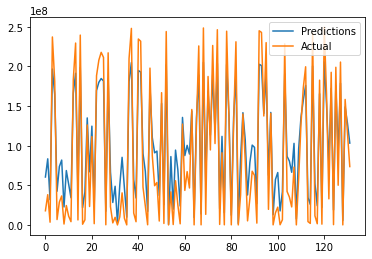

In [37]:
plt.plot(test_linear_pred, label="Predictions")
plt.plot(y_test_confirmed, label="Actual")
plt.legend(loc="best")
train_adjusted_r2 = 1 - (1-linear_model.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-linear_model.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
print('MAE:', mean_absolute_error(y_test_confirmed, test_linear_pred))
print('MSE:', mean_squared_error(y_test_confirmed, test_linear_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_confirmed, test_linear_pred)))
print('R-squared score for train:', linear_model.score(X_train_confirmed, y_train_confirmed))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', linear_model.score(X_test_confirmed, y_test_confirmed))
print('Adjusted R-squared score for test:', test_adjusted_r2)
# print('Cross Validation Score:', round(np.mean(cross_val_score(linear_model, days_since_1_22[days_to_skip:], world_cases[days_to_skip:], cv=5)), 4))
print('Cross Validation Score:', round(np.mean(cross_val_score(linear_model, days_since_1_22, world_cases, cv=5)), 4))

In [38]:
# Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[2.06542498e+08]
 [2.06857350e+08]
 [2.07172201e+08]
 [2.07487052e+08]
 [2.07801904e+08]
 [2.08116755e+08]
 [2.08431607e+08]
 [2.08746458e+08]
 [2.09061309e+08]
 [2.09376161e+08]]


# Polynomial Regression

In [39]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.3, random_state= 0 )
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
poly = PolynomialFeatures(degree = 2)
x_train_poly, x_test_poly = poly.fit_transform(X_train_confirmed), poly.fit_transform(X_test_confirmed)

polyReg = LinearRegression()
poly_model = polyReg.fit(x_train_poly,y_train_confirmed)
coef = poly_model.coef_
intercept = poly_model.intercept_
coef


array([[    0.        , 83406.19490484,   523.14250265]])

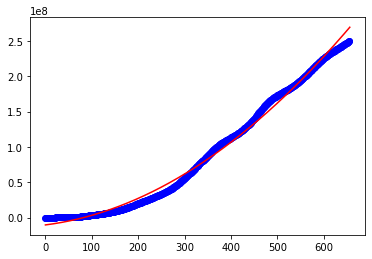

In [41]:

x_axis = np.arange(0, len(days_since_1_22), 0.1)
response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2 
plt.scatter(days_since_1_22, world_cases, color='b')
plt.plot(x_axis, response, color='r')
plt.show()

In [42]:
prediction = poly_model.predict(x_test_poly)
print("R2 Score for test:",r2_score(prediction, y_test_confirmed))
print("Test Adjusted R2 for test:",1-(1-r2_score(prediction, y_test_confirmed))*(len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1))
# print((1- (r2_score(prediction, y_test_confirmed)))*(len(world_cases)-1)/())
print('MAE:', mean_absolute_error(prediction, y_test_confirmed))
print('RMSE:',math.sqrt(mean_squared_error(prediction, y_test_confirmed)))
print("Cross Validation Score: " +str(np.mean(cross_val_score(poly_model,days_since_1_22 , world_cases, cv=k_fold))))
print("Future Prediction: ")
for i in future_forecast[-10:]:
    print(poly_model.predict(poly.fit_transform([i])))

R2 Score for test: 0.9920272726974461
Test Adjusted R2 for test: 0.9920150819829162
MAE: 6440956.606111247
RMSE: 7490821.949822728
Cross Validation Score: 0.9509705165059769
Future Prediction: 
[[2.69404414e+08]]
[[2.70174706e+08]]
[[2.70946045e+08]]
[[2.7171843e+08]]
[[2.72491861e+08]]
[[2.73266338e+08]]
[[2.74041862e+08]]
[[2.74818432e+08]]
[[2.75596048e+08]]
[[2.76374711e+08]]


In [43]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(5)}
poly_grid = RandomizedSearchCV(PolynomialRegression(), param_grid, cv=5)
poly_grid.fit(X_train_confirmed,y_train_confirmed)
print('best_score:', poly_grid.best_score_)
print('best_params:', poly_grid.best_params_)

best_score: 0.9988259119045054
best_params: {'polynomialfeatures__degree': 4}


C:\Users\wei-d\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Due to overfitting issue, we would not want to use degree 4 as it will affect future model performance and prediction. 

# Random Forest

In [44]:
def model_and_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    #put a trail loop inside 
    for i in range(4):
        
        n_estimators = 6 ** i

        rf_model = RandomForestRegressor(
            n_estimators = n_estimators,
            bootstrap = True,
            n_jobs = -1,
            max_depth=3
        )

        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test,y_pred) 
        train_adjusted_r2 = 1 - (1-rf_model.score(X_train, y_train)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
        test_adjusted_r2 = 1 - (1-rf_model.score(X_test, y_test)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
        rsq = r2_score(y_test,y_pred)
        print(f'Estimators: {n_estimators}')       
        print('MAE:', mae)
        print('MSE:', mse)
        print('RMSE:', rmse)
        print('R-squared score for train:', rf_model.score(X_train, y_train))
        print('Adjusted R-squared score for train:', train_adjusted_r2)
        print('R-squared score for test:', rf_model.score(X_test, y_test))
        print('Adjusted R-squared score for test:', test_adjusted_r2)
        print('Cross Validation Score:', round(np.mean(cross_val_score(rf_model, days_since_1_22, world_cases.ravel(), cv=KFold(n_splits=5, shuffle=True, random_state=42))), 4))
        print('--------------------------------------')
        print()

def get_most_important_features(X, y, n_estimators):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

    rf_model = RandomForestRegressor(
        n_estimators = n_estimators,
        bootstrap = True,
        n_jobs = -1
    )

    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)


model_and_accuracy(days_since_1_22, world_cases.ravel())

Estimators: 1
MAE: 7281008.607493272
MSE: 80737780977956.36
RMSE: 8985420.467510486
R-squared score for train: 0.9885716189189522
Adjusted R-squared score for train: 0.9885541443301432
R-squared score for test: 0.9899741649965995
Adjusted R-squared score for test: 0.9899588349736586
Cross Validation Score: 0.9885
--------------------------------------

Estimators: 6
MAE: 6212049.473373677
MSE: 63328777409461.41
RMSE: 7957938.01241637
R-squared score for train: 0.992139328520377
Adjusted R-squared score for train: 0.9921273091450259
R-squared score for test: 0.9921359756785032
Adjusted R-squared score for test: 0.9921239511764826
Cross Validation Score: 0.9937
--------------------------------------

Estimators: 36
MAE: 5275455.168816876
MSE: 44269843018453.45
RMSE: 6653558.673255498
R-squared score for train: 0.9945751514842158
Adjusted R-squared score for train: 0.9945668566088094
R-squared score for test: 0.9945026710376071
Adjusted R-squared score for test: 0.9944942653358297
Cross V

In [45]:
X_train, X_test, y_train, y_test = train_test_split(days_since_1_22, world_cases.ravel(), test_size = 0.2, random_state = 42)

rf_find_best = RandomForestRegressor(
            n_estimators = 1,
            bootstrap = True,
            n_jobs = -1,
            max_depth=3
        )

distributions = {
    "n_estimators":[x for x in range(1,31,2)],
    "max_depth":[x for x in range(1,10)]
}

clf = RandomizedSearchCV(rf_find_best,distributions,random_state=42)
search = clf.fit(X_train, y_train)
search.best_params_


{'n_estimators': 17, 'max_depth': 9}

In [46]:
rf_best = RandomForestRegressor(
            n_estimators = 17,
            bootstrap = True,
            n_jobs = -1,
            max_depth=9
        )
rf_best.fit(X_train,y_train)

y_pred = rf_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred) 
train_adjusted_r2 = 1 - (1-rf_best.score(X_train, y_train)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-rf_best.score(X_test, y_test)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
rsq = r2_score(y_test,y_pred)
print(f'Estimators: 15')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared score for train:', rf_best.score(X_train, y_train))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', rf_best.score(X_test, y_test))
print('Adjusted R-squared score for test:', test_adjusted_r2)
print('Cross Validation Score:', round(np.mean(cross_val_score(rf_best, days_since_1_22, world_cases.ravel(), cv=KFold(n_splits=5, shuffle=True, random_state=42))), 4))


Estimators: 15
MAE: 260739.66404962263
MSE: 149718609085.43542
RMSE: 386934.88998206845
R-squared score for train: 0.9999965097990727
Adjusted R-squared score for train: 0.9999965044623741
R-squared score for test: 0.999981408281805
Adjusted R-squared score for test: 0.9999813798541014
Cross Validation Score: 1.0


# Decision Tree

In [47]:

dtr = DecisionTreeRegressor(
            criterion= "squared_error"
        )

distributions = {
    "criterion":["mse","friedman_mse","mae","poisson"],
    "max_depth":[x for x in range(1,10)],
    "min_samples_split": [x for x in range(1,20)],
    "min_samples_leaf": [x for x in range(1,20)]
}

clf = RandomizedSearchCV(dtr,distributions,random_state=42)
search = clf.fit(X_train, y_train)
search.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 7,
 'max_depth': 9,
 'criterion': 'friedman_mse'}

In [48]:
dtr_best = DecisionTreeRegressor(
        criterion="friedman_mse",
        min_samples_leaf=7,
        min_samples_split=15,
        max_depth=9
        )
dtr_best.fit(X_train,y_train)

y_pred = dtr_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred) 
train_adjusted_r2 = 1 - (1-dtr_best.score(X_train, y_train)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-dtr_best.score(X_test, y_test)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
rsq = r2_score(y_test,y_pred)
print("Prediction Score:", dtr_best.score(X_test, y_test))
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared score for train:', dtr_best.score(X_train, y_train))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', dtr_best.score(X_test, y_test))
print('Adjusted R-squared score for test:', test_adjusted_r2)
print('Cross Validation Score:', round(np.mean(cross_val_score(dtr_best, days_since_1_22, world_cases.ravel(), cv=KFold(n_splits=5, shuffle=True, random_state=42))), 4))


Prediction Score: 0.9995675898764633
MAE: 1398246.2694745068
MSE: 3482187152982.0103
RMSE: 1866061.9370701527
R-squared score for train: 0.9996750215445324
Adjusted R-squared score for train: 0.999674524635579
R-squared score for test: 0.9995675898764633
Adjusted R-squared score for test: 0.9995669286989044
Cross Validation Score: 0.9993
